IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


IMPORTING DATASET

In [2]:
dailyDF = pd.read_excel('Daily_COVID19_Data.xlsx', dtype = str)                 #it is easier to work with string data type so we converted all values to str and filled the missing values with ''
dailyDF.fillna('', inplace=True)                                                #we will convert the necessary values to integer again
dailyDF.head()

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,31 MAYIS 2022,,,,,,,975,,128.854,4,946
1,30 MAYIS 2022,,,,,,,908,,133.352,4,1.005
2,29 MAYIS 2022,,,,,,,864,,129.961,2,1.107
3,28 MAYIS 2022,,,,,,,966,,138.752,3,1.104
4,27 MAYIS 2022,,,,,,,940,,134.252,4,1.237


In [3]:
dailyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Tarih                         812 non-null    object
 1   Toplam Test Sayısı            812 non-null    object
 2   Toplam Vaka Sayısı            812 non-null    object
 3   Toplam Vefat Sayısı           812 non-null    object
 4   Hastalarda Zatürre Oranı (%)  812 non-null    object
 5   Ağır Hasta Sayısı             812 non-null    object
 6   Toplam İyileşen Hasta Sayısı  812 non-null    object
 7   Bugünkü Vaka Sayısı           812 non-null    object
 8   Bugünkü Hasta Sayısı          812 non-null    object
 9   Bugünkü Test Sayısı           812 non-null    object
 10  Bugünkü Vefat Sayısı          812 non-null    object
 11  Bugünkü İyileşen Sayısı       812 non-null    object
dtypes: object(12)
memory usage: 76.2+ KB


TRANSLATING LABEL NAMES TO ENGLISH

In [4]:
dailyDF['Date'] = dailyDF['Tarih']
dailyDF['# Total Test'] = dailyDF['Toplam Test Sayısı']
dailyDF['# Total Case'] = dailyDF['Toplam Vaka Sayısı']
dailyDF['# Total Deaths'] = dailyDF['Toplam Vefat Sayısı']
dailyDF["Flu Percentage"] = dailyDF['Hastalarda Zatürre Oranı (%)']
dailyDF['# Heavy Patients'] = dailyDF['Ağır Hasta Sayısı']
dailyDF['# Total Recovered'] = dailyDF['Toplam İyileşen Hasta Sayısı']
dailyDF["# Daily Cases"] = dailyDF['Bugünkü Vaka Sayısı']
dailyDF['# Daily Patients'] = dailyDF['Bugünkü Hasta Sayısı']
dailyDF['# Daily Tests'] = dailyDF['Bugünkü Test Sayısı']
dailyDF['# Daily Deaths'] = dailyDF['Bugünkü Vefat Sayısı']
dailyDF['# Daily Recovered'] = dailyDF['Bugünkü İyileşen Sayısı']




DROPPING TURKISH NAMED COLUMNS

In [5]:
dailyDF.drop(labels = 'Tarih', axis= 1, inplace= True)
dailyDF.drop(labels = 'Toplam Test Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Toplam Vaka Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Toplam Vefat Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Hastalarda Zatürre Oranı (%)', axis= 1, inplace= True)
dailyDF.drop(labels = 'Ağır Hasta Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Toplam İyileşen Hasta Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Bugünkü Hasta Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Bugünkü Vaka Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Bugünkü Test Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Bugünkü Vefat Sayısı', axis= 1, inplace= True)
dailyDF.drop(labels = 'Bugünkü İyileşen Sayısı', axis= 1, inplace= True)

In [6]:
dailyDF.head()

,Date,# Total Test,# Total Case,# Total Deaths,Flu Percentage,# Heavy Patients,# Total Recovered,# Daily Cases,# Daily Patients,# Daily Tests,# Daily Deaths,# Daily Recovered
0,31 MAYIS 2022,,,,,,,975,,128.854,4,946
1,30 MAYIS 2022,,,,,,,908,,133.352,4,1.005
2,29 MAYIS 2022,,,,,,,864,,129.961,2,1.107
3,28 MAYIS 2022,,,,,,,966,,138.752,3,1.104
4,27 MAYIS 2022,,,,,,,940,,134.252,4,1.237


In [7]:
dailyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               812 non-null    object
 1   # Total Test       812 non-null    object
 2   # Total Case       812 non-null    object
 3   # Total Deaths     812 non-null    object
 4   Flu Percentage     812 non-null    object
 5   # Heavy Patients   812 non-null    object
 6   # Total Recovered  812 non-null    object
 7   # Daily Cases      812 non-null    object
 8   # Daily Patients   812 non-null    object
 9   # Daily Tests      812 non-null    object
 10  # Daily Deaths     812 non-null    object
 11  # Daily Recovered  812 non-null    object
dtypes: object(12)
memory usage: 76.2+ KB


CONVERTING MONTH NAMES TO ENGLISH

In [8]:
def changeMonth(month):
    if (month == 'OCAK'):
        month = 'JANUARY'
    elif (month == 'ŞUBAT'):
        month = 'FEBRUARY'
    elif (month == 'MART'):
        month = 'MARCH'
    elif (month == 'NİSAN'):
        month = 'APRIL'
    elif (month == 'MAYIS'):
        month = 'MAY'
    elif (month == 'HAZİRAN'):
        month = 'JUNE'
    elif (month == 'TEMMUZ'):
        month = 'JULY'
    elif (month == 'AĞUSTOS'):
        month = 'AUGUST'
    elif (month == 'EYLÜL'):
        month = 'SEPTEMBER'
    elif (month == 'EKİM'):
        month = 'OCTOBER'
    elif (month == 'KASIM'):
        month = 'NOVEMBER'
    else:
        month = 'DECEMBER'
    return month
    

In [9]:
def applyMonth(date):
    dateArr = date.split(' ')
    month = dateArr[4]
    month = changeMonth(month)
    dateArr[4] = month
    s = ""
    for i in dateArr:
        s += i + " "
    return s

In [10]:
dailyDF['Date'] = dailyDF['Date'].apply(lambda x: applyMonth(x))

In [11]:
dailyDF['Date'].head()

0       31 MAY 2022   
1       30 MAY 2022   
2       29 MAY 2022   
3       28 MAY 2022   
4       27 MAY 2022   
Name: Date, dtype: object

CREATING A MONTH COLUMN

In [12]:
dailyDF['Month'] = dailyDF['Date'].apply(lambda x: x.split(' ')[4])

In [13]:
dailyDF['Month']

0        MAY
1        MAY
2        MAY
3        MAY
4        MAY
       ...  
807    MARCH
808    MARCH
809    MARCH
810    MARCH
811    MARCH
Name: Month, Length: 812, dtype: object

CREATING A YEAR COLUMN

In [14]:
dailyDF['Year'] = dailyDF['Date'].apply(lambda x: x.split(' ')[5])

In [15]:
dailyDF['Year']

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
807    2020
808    2020
809    2020
810    2020
811    2020
Name: Year, Length: 812, dtype: object

In [16]:
dailyDF.head()

,Date,# Total Test,# Total Case,# Total Deaths,Flu Percentage,# Heavy Patients,# Total Recovered,# Daily Cases,# Daily Patients,# Daily Tests,# Daily Deaths,# Daily Recovered,Month,Year
0,31 MAY 2022,,,,,,,975,,128.854,4,946,MAY,2022
1,30 MAY 2022,,,,,,,908,,133.352,4,1.005,MAY,2022
2,29 MAY 2022,,,,,,,864,,129.961,2,1.107,MAY,2022
3,28 MAY 2022,,,,,,,966,,138.752,3,1.104,MAY,2022
4,27 MAY 2022,,,,,,,940,,134.252,4,1.237,MAY,2022


CREATING A SEASON COLUMN

In [17]:
def findSeason(month):
    
    if (month == 'DECEMBER' or month == 'JANUARY' or month == 'FEBRURARY'):
        return 'WINTER'
    elif (month == 'MARCH' or month == 'APRIL' or month == 'MAY'):
        return 'SPRING'
    elif (month == 'JUNE' or month == 'JULY' or month == 'AUGUST'):
        return 'SUMMER'
    else:
        return 'FALL'

In [18]:
dailyDF['Season'] = dailyDF['Month'].apply(lambda x: findSeason(x))

In [19]:
dailyDF['Season'].head(100)

0     SPRING
1     SPRING
2     SPRING
3     SPRING
4     SPRING
       ...  
95      FALL
96      FALL
97      FALL
98      FALL
99      FALL
Name: Season, Length: 100, dtype: object

CONVERTING STRING TYPES TO INT

removing decimals in the numbers 

In [20]:
dailyDF['# Daily Cases'] = dailyDF['# Daily Cases'].apply(lambda x: x.replace('.', ''))
dailyDF['# Daily Deaths'] = dailyDF['# Daily Deaths'].apply(lambda x: x.replace('.', ''))
dailyDF['# Daily Tests'] = dailyDF['# Daily Tests'].apply(lambda x: x.replace('.', ''))
dailyDF['# Daily Patients'] = dailyDF['# Daily Patients'].apply(lambda x: x.replace('.', ''))
dailyDF['# Daily Recovered'] = dailyDF['# Daily Recovered'].apply(lambda x: x.replace('.', ''))
dailyDF['# Total Case'] = dailyDF['# Total Case'].apply(lambda x: x.replace('.', ''))
dailyDF['# Total Deaths'] = dailyDF['# Total Deaths'].apply(lambda x: x.replace('.', ''))
dailyDF['# Total Recovered'] = dailyDF['# Total Recovered'].apply(lambda x: x.replace('.', ''))
dailyDF['# Total Test'] = dailyDF['# Total Test'].apply(lambda x: x.replace('.', ''))
dailyDF['# Heavy Patients'] = dailyDF['# Heavy Patients'].apply(lambda x: x.replace('.',''))

dailyDF['# Daily Cases'] = dailyDF['# Daily Cases'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Daily Deaths'] = dailyDF['# Daily Deaths'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Daily Tests'] = dailyDF['# Daily Tests'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Daily Patients'] = dailyDF['# Daily Patients'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Daily Recovered'] = dailyDF['# Daily Recovered'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Total Case'] = dailyDF['# Total Case'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Total Deaths'] = dailyDF['# Total Deaths'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Total Recovered'] = dailyDF['# Total Recovered'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Total Test'] = dailyDF['# Total Test'].apply(lambda x: x.replace(' ', ''))
dailyDF['# Heavy Patients'] = dailyDF['# Heavy Patients'].apply(lambda x: x.replace(' ', ''))

In [21]:
def convertToInt(s):
    if (s !=''):
        return int(s)
    else:
        return -1                   #missing rows are converted to -1, will be filled later 


In [22]:
dailyDF['# Daily Cases'] = dailyDF['# Daily Cases'].apply(lambda x: convertToInt(x))
dailyDF['# Daily Deaths'] = dailyDF['# Daily Deaths'].apply(lambda x: convertToInt(x))
dailyDF['# Daily Tests'] = dailyDF['# Daily Tests'].apply(lambda x: convertToInt(x))
dailyDF['# Daily Patients'] = dailyDF['# Daily Patients'].apply(lambda x: convertToInt(x))
dailyDF['# Daily Recovered'] = dailyDF['# Daily Recovered'].apply(lambda x: convertToInt(x))
dailyDF['# Total Case'] = dailyDF['# Total Case'].apply(lambda x: convertToInt(x))
dailyDF['# Total Deaths'] = dailyDF['# Total Deaths'].apply(lambda x: convertToInt(x))
dailyDF['# Total Recovered'] = dailyDF['# Total Recovered'].apply(lambda x: convertToInt(x))
dailyDF['# Total Test'] = dailyDF['# Total Test'].apply(lambda x: convertToInt(x))
dailyDF['# Heavy Patients'] = dailyDF['# Heavy Patients'].apply(lambda x: convertToInt(x))


CONVERTING STRING TYPES TO FLOAT

In [23]:
def convertToFloat(x):
    if x != '':
        return float(x)
    else:
        return -1.0

In [24]:
dailyDF['Flu Percentage'] = dailyDF['Flu Percentage'].apply(lambda x : x.replace(',','.'))
dailyDF['Flu Percentage'] = dailyDF['Flu Percentage'].apply(lambda x : x.replace(' ',''))
dailyDF['Flu Percentage'] = dailyDF['Flu Percentage'].apply(lambda x : convertToFloat(x))

FILLING THE MISSING COLUMNS

In [25]:
dailyDF.head()

,Date,# Total Test,# Total Case,# Total Deaths,Flu Percentage,# Heavy Patients,# Total Recovered,# Daily Cases,# Daily Patients,# Daily Tests,# Daily Deaths,# Daily Recovered,Month,Year,Season
0,31 MAY 2022,-1,-1,-1,-1.0,-1,-1,975,-1,128854,4,946,MAY,2022,SPRING
1,30 MAY 2022,-1,-1,-1,-1.0,-1,-1,908,-1,133352,4,1005,MAY,2022,SPRING
2,29 MAY 2022,-1,-1,-1,-1.0,-1,-1,864,-1,129961,2,1107,MAY,2022,SPRING
3,28 MAY 2022,-1,-1,-1,-1.0,-1,-1,966,-1,138752,3,1104,MAY,2022,SPRING
4,27 MAY 2022,-1,-1,-1,-1.0,-1,-1,940,-1,134252,4,1237,MAY,2022,SPRING


filling '# Total Test'

In [26]:
for i in range (795,-1,-1):
    if (dailyDF['# Total Test'][i] == -1):
        dailyDF.loc[i, '# Total Test'] = dailyDF.loc[i+1, '# Total Test'] + dailyDF.loc[i, '# Daily Tests']

filling '# Total Case'

In [27]:
for i in range (795, -1, -1):
    if (dailyDF['# Total Case'][i] == -1):
        dailyDF.loc[i,'# Total Case'] = dailyDF.loc[i+1,'# Total Case'] + dailyDF.loc[i,'# Daily Cases']

filling '# Total Deaths'

In [28]:
for i in range (795, -1, -1):
    if (dailyDF['# Total Deaths'][i] == -1):
        dailyDF.loc[i, '# Total Deaths'] = dailyDF.loc[i+1, '# Total Deaths'] + dailyDF.loc[i, '# Daily Deaths']

filling '# Total Recovered'

In [29]:
for i in range (795, -1, -1):
    if (dailyDF['# Total Recovered'][i] == -1):
        dailyDF.loc[i,'# Total Recovered'] = dailyDF.loc[i+1,'# Total Recovered'] + dailyDF.loc[i,'# Daily Recovered']

In [30]:
dailyDF.head()

,Date,# Total Test,# Total Case,# Total Deaths,Flu Percentage,# Heavy Patients,# Total Recovered,# Daily Cases,# Daily Patients,# Daily Tests,# Daily Deaths,# Daily Recovered,Month,Year,Season
0,31 MAY 2022,163204823,15072747,98965,-1.0,-1,14960730,975,-1,128854,4,946,MAY,2022,SPRING
1,30 MAY 2022,163075969,15071772,98961,-1.0,-1,14959784,908,-1,133352,4,1005,MAY,2022,SPRING
2,29 MAY 2022,162942617,15070864,98957,-1.0,-1,14958779,864,-1,129961,2,1107,MAY,2022,SPRING
3,28 MAY 2022,162812656,15070000,98955,-1.0,-1,14957672,966,-1,138752,3,1104,MAY,2022,SPRING
4,27 MAY 2022,162673904,15069034,98952,-1.0,-1,14956568,940,-1,134252,4,1237,MAY,2022,SPRING


In [31]:
slicedDf = dailyDF.copy()

In [32]:
slicedDf = slicedDf.drop(slicedDf.index[672: ])
slicedDf = slicedDf.drop(slicedDf.index[0:332 ])

In [33]:
slicedDf.head()

,Date,# Total Test,# Total Case,# Total Deaths,Flu Percentage,# Heavy Patients,# Total Recovered,# Daily Cases,# Daily Patients,# Daily Tests,# Daily Deaths,# Daily Recovered,Month,Year,Season
332,3 JULY 2021,61455218,5440368,49874,3.7,702,5310769,4537,478,218924,45,4913,JULY,2021,SUMMER
333,2 JULY 2021,61236294,5435831,49829,3.7,697,5305856,4891,461,223782,55,5352,JULY,2021,SUMMER
334,1 JULY 2021,61012512,5430940,49774,3.7,706,5300504,5288,462,225537,42,6219,JULY,2021,SUMMER
335,30 JUNE 2021,60786975,5425652,49732,3.7,727,5294285,5496,522,228163,45,7191,JUNE,2021,SUMMER
336,29 JUNE 2021,60558812,5420156,49687,3.7,730,5287094,5846,510,229846,53,6536,JUNE,2021,SUMMER


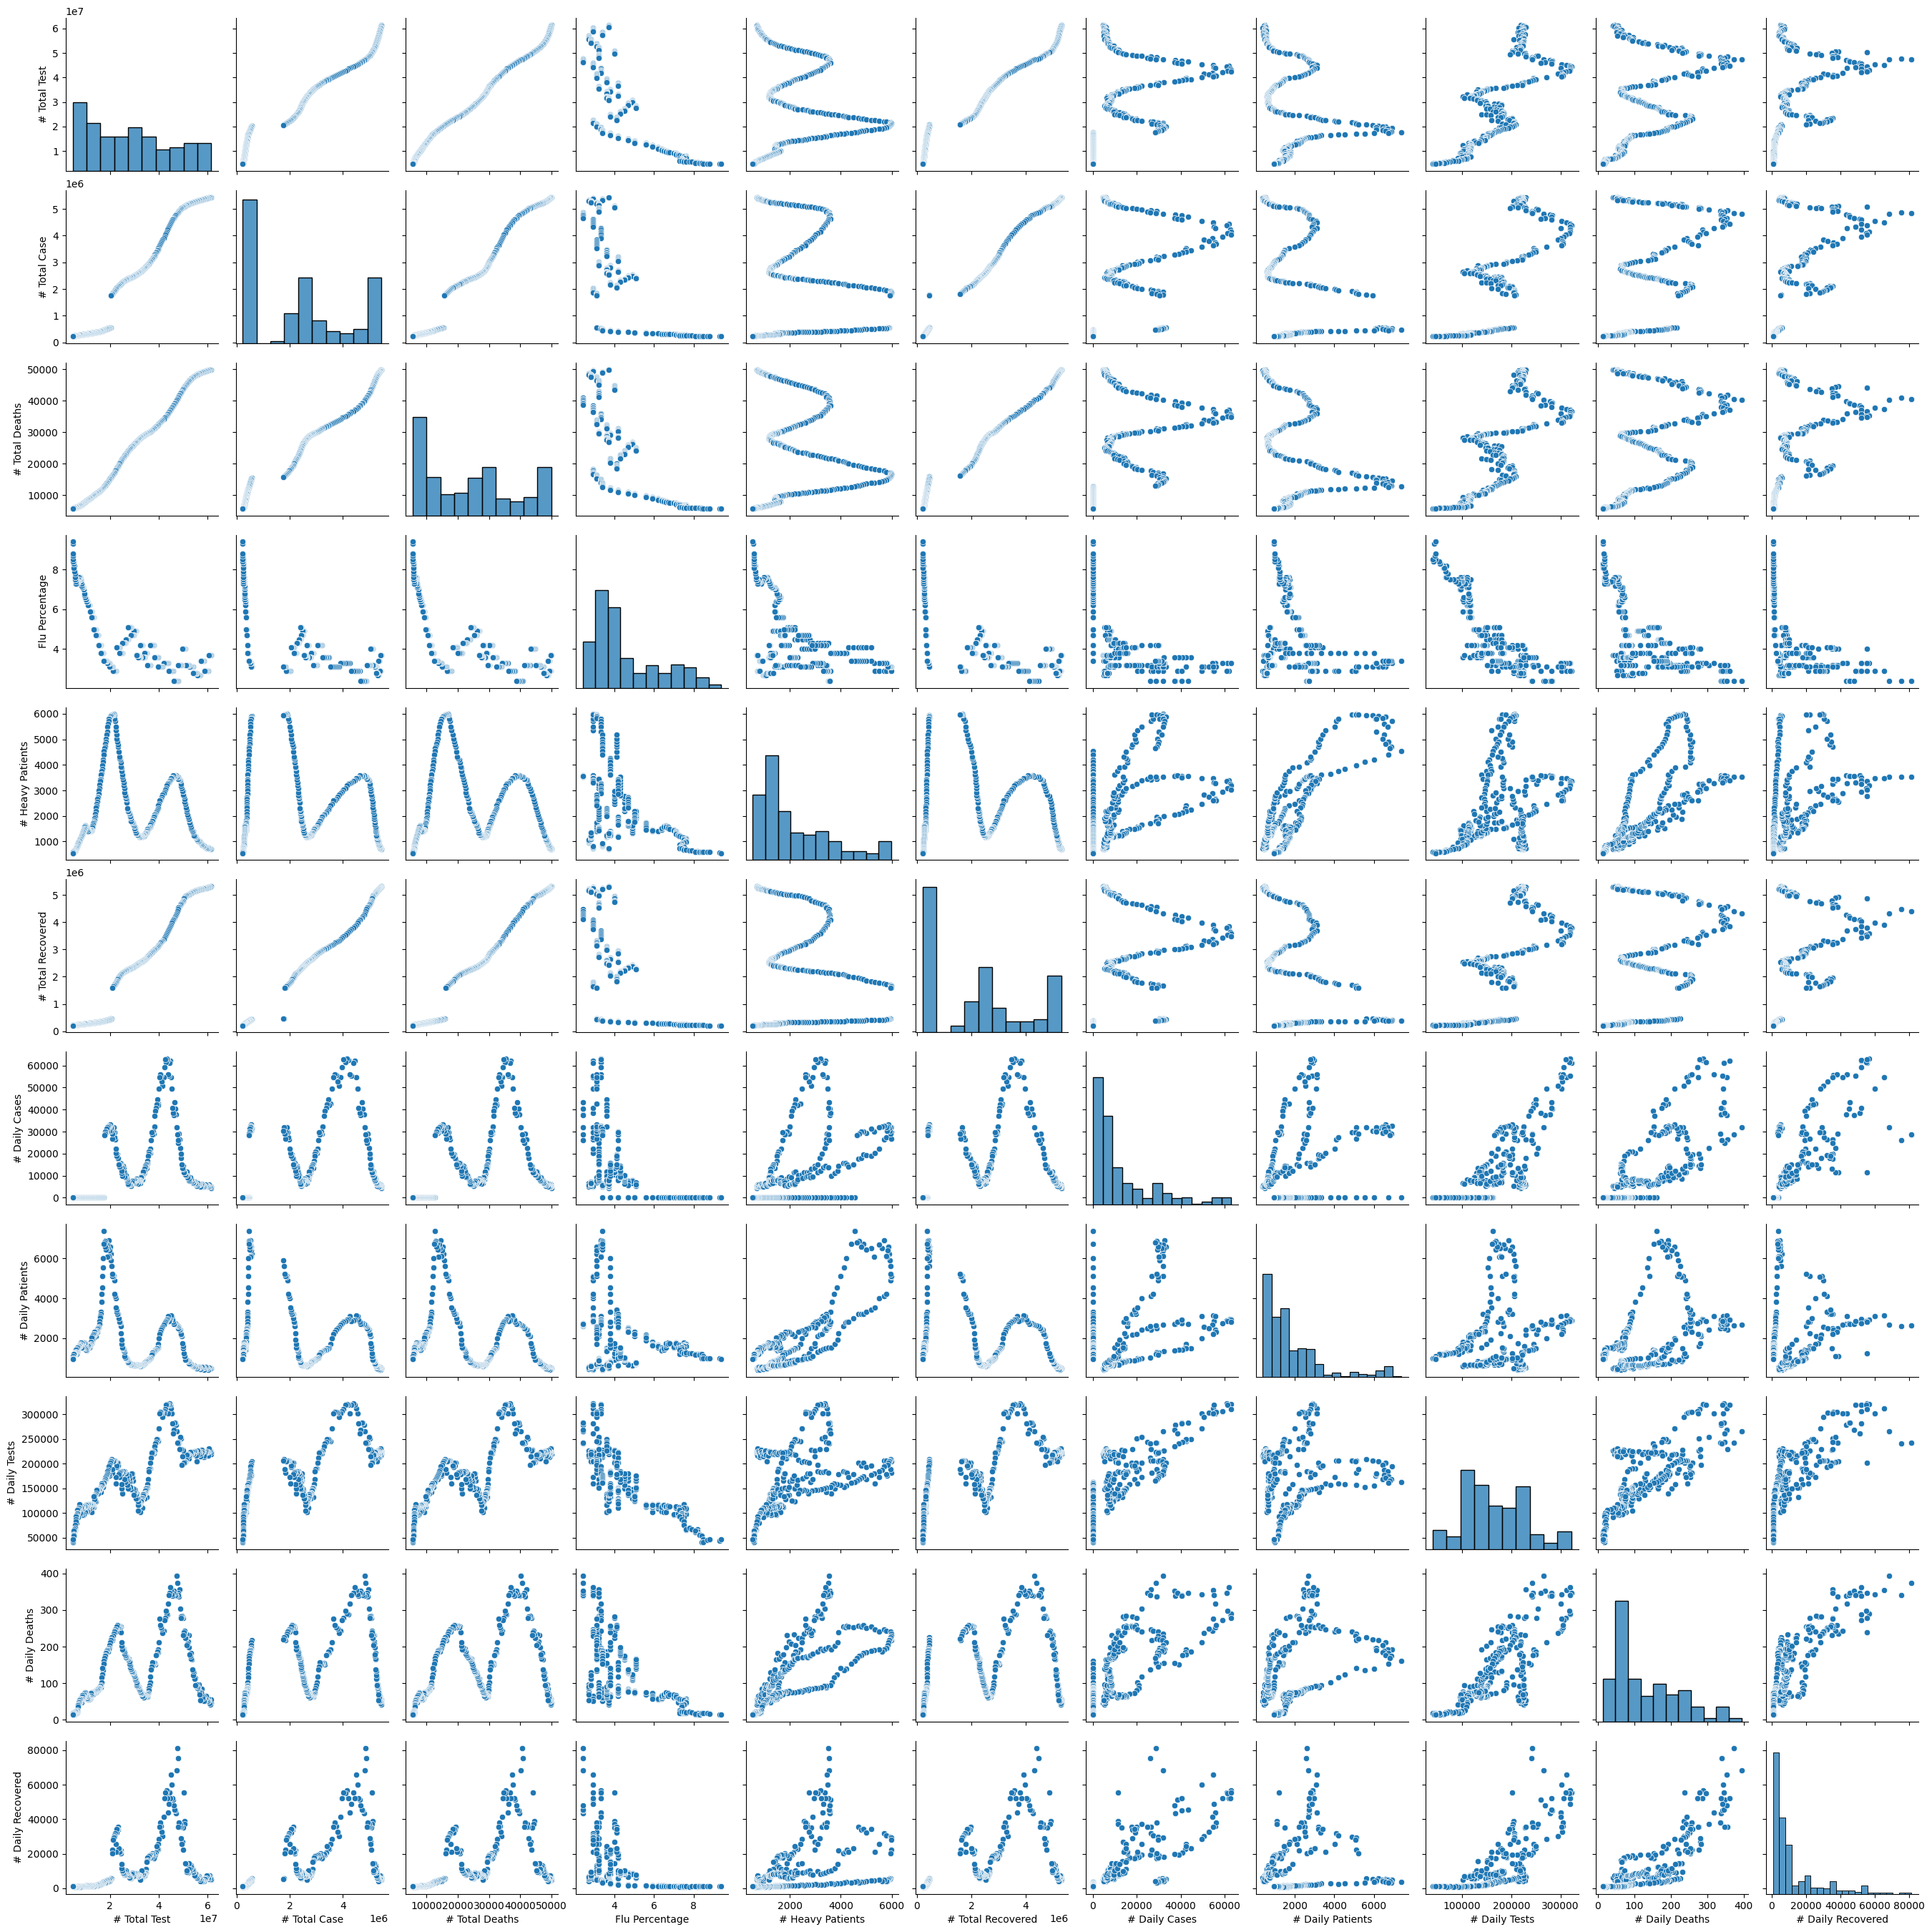

In [34]:
sns.pairplot(slicedDf)
plt.savefig("Pairplot_Covid.png")

CORRELATION ANALYSIS FOR "# Daily Deaths"

In [35]:
np.corrcoef(slicedDf["# Daily Deaths"], slicedDf["# Heavy Patients"])[0,1]

0.7259131357464037

In [36]:
np.corrcoef(slicedDf["# Daily Deaths"], slicedDf["# Daily Tests"])[0,1]

0.7620363665056303

In [37]:
np.corrcoef(slicedDf["# Daily Deaths"], slicedDf["# Daily Cases"])[0,1]

0.7645719956848052

In [38]:
np.corrcoef(slicedDf["# Daily Deaths"], slicedDf["# Daily Recovered"])[0,1]

0.8418022946879036

In [39]:
np.corrcoef(slicedDf["# Daily Deaths"], slicedDf["# Daily Patients"])[0,1]

0.42694613010213783

In [40]:
np.corrcoef(slicedDf["# Daily Deaths"], slicedDf["Flu Percentage"])[0,1]

-0.6195832782305146

CORRELATION ANALYSIS FOR "Flu Percentage"

In [41]:
np.corrcoef(slicedDf["Flu Percentage"], slicedDf["# Daily Cases"])[0,1]

-0.5643031723477212

In [42]:
np.corrcoef(slicedDf["Flu Percentage"], slicedDf["# Daily Patients"])[0,1]

-0.20842210343561793

In [43]:
np.corrcoef(slicedDf["Flu Percentage"], slicedDf["# Daily Recovered"])[0,1]

-0.5125625763707005

In [44]:
np.corrcoef(slicedDf["Flu Percentage"], slicedDf["# Daily Tests"])[0,1]

-0.8023353310741176

In [45]:
np.corrcoef(slicedDf["Flu Percentage"], slicedDf["# Heavy Patients"])[0,1]

-0.47791492720390566

In [46]:
np.corrcoef(slicedDf["Flu Percentage"], slicedDf["# Daily Deaths"])[0,1]

-0.6195832782305146

CORRELATION ANALYSIS FOR "# Heavy Patients"

In [47]:
np.corrcoef(slicedDf["# Heavy Patients"], slicedDf["# Daily Patients"])[0,1]

0.8518822958536033

In [48]:
np.corrcoef(slicedDf["# Heavy Patients"], slicedDf["# Daily Cases"])[0,1]

0.5348358636289259

In [49]:
np.corrcoef(slicedDf["# Heavy Patients"], slicedDf["# Daily Recovered"])[0,1]

0.42893250848510633

In [50]:
np.corrcoef(slicedDf["# Heavy Patients"], slicedDf["# Daily Tests"])[0,1]

0.41407232668888905

In [51]:
np.corrcoef(slicedDf["# Heavy Patients"], slicedDf["# Daily Deaths"])[0,1]

0.7259131357464037

In [52]:
np.corrcoef(slicedDf["# Heavy Patients"], slicedDf["Flu Percentage"])[0,1]

-0.47791492720390566

'Flu Percentage' and '# Daily Patients' does not seem to be correlated with other features, thus it is not quite impossible for us to fill the missing values.
'# Heavy Patients' seems to be corrolated with '# Daily Patients' and '# Daily Deaths' but since we do not have information about '# Daily Patients' it would be impossible to fill the missing values of '# Heavy Patients'. 

Because of these reasons, we will drop 'Flu Percentage', '# Heavy Patients', '# Daily Patients' and focus on other features to train a ML model to predict '# Daily Deaths'

In [53]:
dailyDF.drop(['# Heavy Patients', 'Flu Percentage', '# Daily Patients'], axis=1, inplace= True)

In [54]:
dailyDF.head()

,Date,# Total Test,# Total Case,# Total Deaths,# Total Recovered,# Daily Cases,# Daily Tests,# Daily Deaths,# Daily Recovered,Month,Year,Season
0,31 MAY 2022,163204823,15072747,98965,14960730,975,128854,4,946,MAY,2022,SPRING
1,30 MAY 2022,163075969,15071772,98961,14959784,908,133352,4,1005,MAY,2022,SPRING
2,29 MAY 2022,162942617,15070864,98957,14958779,864,129961,2,1107,MAY,2022,SPRING
3,28 MAY 2022,162812656,15070000,98955,14957672,966,138752,3,1104,MAY,2022,SPRING
4,27 MAY 2022,162673904,15069034,98952,14956568,940,134252,4,1237,MAY,2022,SPRING


Filling the missing values in '# Daily Cases'

In [55]:
for i in range(0, 811):
    if (dailyDF['# Daily Cases'][i] == -1):
        dailyDF.loc[i, '# Daily Cases'] = dailyDF.loc[i, '# Total Case'] - dailyDF.loc[i+1, '# Total Case']

The earliest day where each cell is known is 4th of April 2020, we will drop the rows before that day

In [56]:
dailyDF = dailyDF.drop(dailyDF.index[788:])

In [57]:
dailyDF.tail(50)

,Date,# Total Test,# Total Case,# Total Deaths,# Total Recovered,# Daily Cases,# Daily Tests,# Daily Deaths,# Daily Recovered,Month,Year,Season
738,23 MAY 2020,1807673,155686,4308,117602,1186,40178,32,1491,MAY,2020,SPRING
739,22 MAY 2020,1767495,154500,4276,116111,952,37507,27,1121,MAY,2020,SPRING
740,21 MAY 2020,1729988,153548,4249,114990,961,33633,27,1003,MAY,2020,SPRING
741,20 MAY 2020,1696355,152587,4222,113987,972,20838,23,1092,MAY,2020,SPRING
742,19 MAY 2020,1675517,151615,4199,112895,1022,25382,28,1318,MAY,2020,SPRING
743,18 MAY 2020,1650135,150593,4171,111577,1158,25141,31,1615,MAY,2020,SPRING
744,17 MAY 2020,1624994,149435,4140,109962,1368,35369,44,1825,MAY,2020,SPRING
745,16 MAY 2020,1589625,148067,4096,108137,1610,42236,41,2004,MAY,2020,SPRING
746,15 MAY 2020,1547389,146457,4055,106133,1708,38565,48,2103,MAY,2020,SPRING
747,14 MAY 2020,1508824,144749,4007,104030,1635,34821,55,2315,MAY,2020,SPRING


In [58]:
dailyDF.to_excel('Dataset_for_ML.xlsx', index= False)